# Rosenbrock Function Optimization (6D)

This notebook demonstrates the optimization of the 6-dimensional Rosenbrock function using the Differential Evolution algorithm from `scipy.optimize`.

## Constraints
- **Dimensions**: 6
- **Search Bounds**: [-2, 2] for all dimensions
- **Function Evaluations**: ~100
- **Starting Points**: Random (handled by Differential Evolution initialization)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# Set random seed for reproducibility
np.random.seed(42)

## Define Rosenbrock Function

The Rosenbrock function is defined as:
$$ f(x) = \sum_{i=0}^{N-2} [100 (x_{i+1} - x_i^2)^2 + (1 - x_i)^2] $$

In [2]:
def rosenbrock(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

# Define bounds for 6 dimensions
bounds = [(-2, 2)] * 6

## Optimization with Differential Evolution

We use `differential_evolution` with a small population size to limit the number of function evaluations to approximately 100.

**Note on Evaluations**:
Differential Evolution uses a population-based approach. The number of evaluations is roughly:
`(maxiter + 1) * popsize * len(x)`

To stay near 100 evaluations with 6 dimensions:
- `popsize` = 2 (Population = 2 * 6 = 12)
- `maxiter` = 8
- Total approx = (8 + 1) * 12 = 108 evaluations.

In [3]:
# List to store the best objective value at each iteration
history = []

def callback(xk, convergence):
    # xk is the best solution at the current iteration
    val = rosenbrock(xk)
    history.append(val)
    # Note: 'convergence' is val / solver.tol or similar, so we compute val directly for plotting

# Run Differential Evolution
result = differential_evolution(
    rosenbrock,
    bounds,
    popsize=2,        # Small population to limit evaluations
    maxiter=100,        # Limit generations
    callback=callback,
    disp=True,
    polish=False      # Disable polishing to strictly control evaluations
)

print("Optimization Result:")
print(result)

differential_evolution step 1: f(x)= 225.2762024833075
differential_evolution step 2: f(x)= 112.60542467941752
differential_evolution step 3: f(x)= 61.713627469493915
differential_evolution step 4: f(x)= 41.45224346687308
differential_evolution step 5: f(x)= 41.45224346687308
differential_evolution step 6: f(x)= 41.45224346687308
differential_evolution step 7: f(x)= 10.64134557068811
differential_evolution step 8: f(x)= 10.64134557068811
differential_evolution step 9: f(x)= 10.64134557068811
differential_evolution step 10: f(x)= 10.64134557068811
differential_evolution step 11: f(x)= 10.64134557068811
differential_evolution step 12: f(x)= 9.134422132573786
differential_evolution step 13: f(x)= 3.6366616621866887
differential_evolution step 14: f(x)= 3.6366616621866887
differential_evolution step 15: f(x)= 3.6366616621866887
differential_evolution step 16: f(x)= 2.257552873413639
differential_evolution step 17: f(x)= 2.257552873413639
differential_evolution step 18: f(x)= 2.257552873413

## Visualization

Plotting the convergence of the optimization.

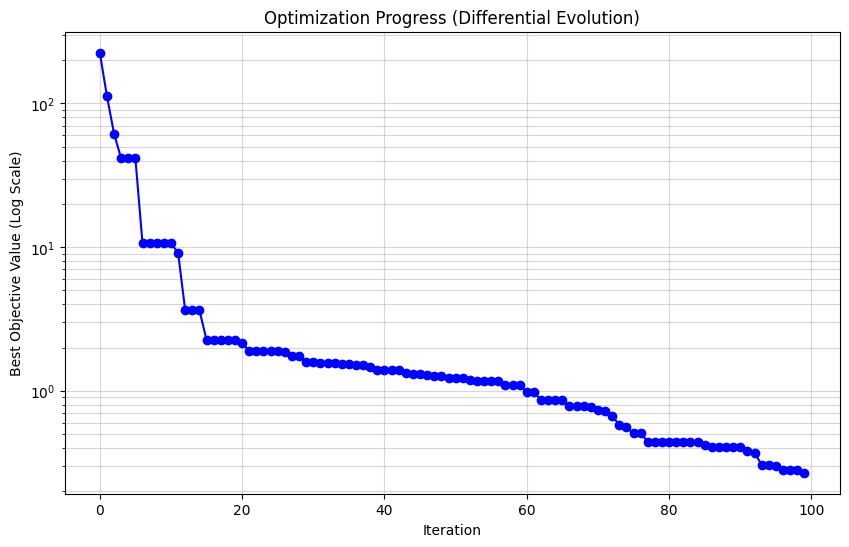

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(history, marker='o', linestyle='-', color='b')
plt.title('Optimization Progress (Differential Evolution)')
plt.xlabel('Iteration')
plt.ylabel('Best Objective Value (Log Scale)')
plt.yscale('log')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()